# Various experimental visualizations

## How at baseline do datasets differ, 

We will use different datasets now for convenience

In [2]:
import os       # using operating system dependent functionality (folders)
import sys
import glob
from functools import reduce

import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
import seaborn as sns

sys.path.insert(0, '../../') # path to functions
import cvasl.seperated as sep
from cvasl.file_handler import Config
import cvasl.harmony as har


In [3]:
base_path = 'C:/Projects/cvasl/open_work/internal_results/cleaned_pvc2s'

In [20]:
SAB_s= 'SABRE_pvc2_cleaned.csv'
SAB_path = os.path.join(base_path, SAB_s)
SAB = pd.read_csv(SAB_path)
SAB

,Unnamed: 0,participant_id,session_id,run_id,age,sex,site,gm_vol,wm_vol,csf_vol,...,aca_b_cov,aca_l_cov,aca_r_cov,mca_b_cov,mca_l_cov,mca_r_cov,pca_b_cov,pca_l_cov,pca_r_cov,totalgm_b_cov
0,0,sub-100096_1_ses-1_run-1,ASL_1,1,78,M,SABRE,0.56201,0.44945,0.42419,...,3.5865,3.5224,3.6529,3.8956,3.9182,3.8388,4.3534,4.5701,4.2004,3.6690
1,1,sub-100331_1_ses-1_run-1,ASL_1,1,71,M,SABRE,0.53812,0.42593,0.49319,...,4.3543,4.5018,4.1915,4.1134,3.8715,4.3587,3.8613,3.9780,3.5251,3.7593
2,2,sub-102285_1_ses-1_run-1,ASL_1,1,72,M,SABRE,0.56881,0.49224,0.35808,...,4.3167,4.7336,3.8692,4.4410,4.4478,4.4136,3.9533,3.8494,4.0024,3.9991
3,3,sub-103631_1_ses-1_run-1,ASL_1,1,78,M,SABRE,0.54058,0.44982,0.49854,...,3.3727,3.6111,3.1653,3.6072,3.5987,3.5530,2.5689,2.7058,2.3991,3.1516
4,4,sub-104957_1_ses-1_run-1,ASL_1,1,75,M,SABRE,0.61126,0.45005,0.35445,...,3.2107,3.2370,3.1976,3.8602,3.8746,3.8461,3.7044,2.9787,4.4395,3.5672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,723,sub-96612_1_ses-1_run-1,ASL_1,1,72,M,SABRE,0.56008,0.46375,0.41106,...,3.4096,3.2930,3.5277,4.6613,3.7688,5.3458,3.4095,3.1699,3.6520,3.6804
698,724,sub-96645_1_ses-1_run-1,ASL_1,1,73,M,SABRE,0.64191,0.56532,0.40860,...,3.4992,3.2424,3.7313,3.4979,3.1567,3.7696,2.4534,2.1974,2.6933,2.8616
699,725,sub-97154_1_ses-1_run-1,ASL_1,1,71,M,SABRE,0.49420,0.43000,0.26314,...,4.0986,4.3127,3.8997,3.8984,4.0704,3.6738,2.7740,2.7436,2.8136,3.4137
700,726,sub-97819_1_ses-1_run-1,ASL_1,1,72,M,SABRE,0.58200,0.51335,0.39980,...,3.4410,3.3015,3.5599,3.4441,3.4460,3.4408,3.6305,3.5622,3.7114,3.1638


In [18]:
INI_s= 'Insight46_pvc2c.csv'
INI_path = os.path.join(base_path, INI_s)
INI = pd.read_csv(INI_path)
INI

,Unnamed: 0,participant_id,age,sex,gm_vol,wm_vol,csf_vol,gm_ivc_ratio,gmwm_ivc_ratio,wmh_vol,...,deepwm_b_cov,aca_b_cov,mca_b_cov,pca_b_cov,totalgm_b_cov,deepwm_b,aca_b,mca_b,pca_b,totalgm_b
0,0,sub-10015124_1_ses-1_run-1,69.733333,F,0.56794,0.47687,0.34052,0.40997,0.75420,4.889,...,10.9085,2.9146,2.6976,2.9089,2.7193,35.4184,98.9688,95.3166,78.4416,82.1259
1,1,sub-10024822_1_ses-1_run-1,70.288889,F,0.54998,0.41823,0.39773,0.40264,0.70882,24.116,...,4.2235,3.1958,2.6274,3.5953,3.0085,39.2905,143.9933,150.7895,105.6454,115.6007
2,2,sub-10075012_1_ses-1_run-1,69.883333,M,0.66598,0.52698,0.41649,0.41379,0.74122,3.006,...,16.9981,3.9826,3.1185,3.3201,3.1605,17.6784,72.9898,61.8006,56.8064,57.7452
3,3,sub-10113912_1_ses-1_run-1,69.866667,M,0.51792,0.45562,0.47968,0.35639,0.66992,2.413,...,20.7760,5.8048,4.1256,3.5578,3.9497,10.6847,71.0437,60.1963,59.0043,51.7172
4,4,sub-10225826_1_ses-1_run-1,70.661111,F,0.60364,0.50344,0.30076,0.42877,0.78637,10.672,...,8.3941,5.0637,4.2069,4.4389,4.6005,15.0410,44.1221,41.3514,42.3082,38.3344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,288,sub-19887918_1_ses-1_run-1,71.705556,M,0.64042,0.54204,0.45935,0.39007,0.72022,9.007,...,10.5930,3.3541,2.9491,3.4760,3.4540,21.9289,62.6525,59.1829,39.0048,44.7785
278,289,sub-19897113_1_ses-1_run-1,70.822222,M,0.57677,0.43956,0.38981,0.41018,0.72278,1.099,...,15.6982,3.9380,2.9221,2.8730,2.9591,21.9108,67.7116,62.8383,51.0325,57.3795
279,290,sub-19902911_1_ses-1_run-1,71.341667,M,0.69041,0.58660,0.46155,0.39712,0.73452,9.660,...,25.8301,9.5681,5.7637,7.0682,8.3807,10.6247,59.3841,58.8391,29.8952,46.3459
280,291,sub-19910919_1_ses-1_run-1,70.741667,M,0.59420,0.47946,0.50572,0.37622,0.67980,7.064,...,20.1945,15.3015,7.6576,9.0693,8.3122,7.8216,25.1157,26.1558,22.6892,20.7966


In [5]:
TOP_s= 'TOP_pvc2c.csv'
TOP_path = os.path.join(base_path, TOP_s)
TOP = pd.read_csv(TOP_path)
TOP

,Unnamed: 0,participant_id,age,sex,gm_vol,wm_vol,csf_vol,gm_ivc_ratio,gmwm_ivc_ratio,wmh_vol,...,deepwm_b_cov,aca_b_cov,mca_b_cov,pca_b_cov,totalgm_b_cov,deepwm_b,aca_b,mca_b,pca_b,totalgm_b
0,0,sub-0001_1_ses-1_run-1,43.49,M,0.71736,0.52803,0.31812,0.45881,0.79653,1.743,...,8.7620,2.2748,2.3205,2.6858,2.4316,22.1022,80.4744,68.3224,52.4614,60.6981
1,1,sub-0002_1_ses-1_run-1,38.30,F,0.72383,0.62394,0.25673,0.45112,0.83999,1.629,...,9.0749,1.7564,2.3989,1.5982,1.9738,23.5401,87.3972,78.0359,63.9932,71.6047
2,2,sub-0019_1_ses-1_run-1,32.30,M,0.71224,0.53295,0.33594,0.45046,0.78753,0.621,...,8.8791,1.9850,1.8702,2.1648,2.1723,27.5573,94.0855,86.3816,62.6012,74.0588
3,3,sub-0020_1_ses-1_run-1,21.97,F,0.67042,0.43458,0.25974,0.49124,0.80968,0.736,...,6.2080,1.8657,1.9092,1.6402,1.8734,27.1813,100.3259,90.7345,68.0812,79.1128
4,4,sub-0022_1_ses-1_run-1,37.52,F,0.63666,0.46938,0.22144,0.47960,0.83319,2.009,...,7.4561,1.6049,2.0383,1.7943,1.7936,25.4706,86.7965,77.5578,69.0419,73.3492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,526,sub-1163_1_ses-1_run-1,19.06,F,0.78201,0.49489,0.24608,0.51347,0.83842,1.431,...,8.2103,1.9598,2.1176,2.2812,2.1436,29.0297,117.4774,107.4787,84.1319,96.4466
523,527,sub-1165_1_ses-1_run-1,33.86,F,0.71537,0.48601,0.27123,0.48578,0.81582,1.425,...,6.6858,1.4851,1.9477,1.4834,1.8447,25.7284,87.0537,85.7033,66.4337,77.1030
524,528,sub-1167_1_ses-1_run-1,33.92,M,0.73473,0.53549,0.35985,0.45074,0.77924,3.935,...,4.5665,1.8432,2.0176,2.0263,1.9480,21.4760,68.3383,63.4410,43.3879,54.4204
525,529,sub-1168_1_ses-1_run-1,45.31,M,0.71094,0.60974,0.37480,0.41931,0.77894,4.170,...,9.5267,1.7798,1.9444,1.7670,1.8076,21.0647,61.4625,56.6210,43.5347,51.4417


In [4]:
MRI_s= 'StrokeMRI_pvc2c.csv'

MRI_path = os.path.join(base_path, MRI_s)
MRI = pd.read_csv(MRI_path)
MRI

,Unnamed: 0,participant_id,age,sex,gm_vol,wm_vol,csf_vol,gm_ivc_ratio,gmwm_ivc_ratio,wmh_vol,...,deepwm_b_cov,aca_b_cov,mca_b_cov,pca_b_cov,totalgm_b_cov,deepwm_b,aca_b,mca_b,pca_b,totalgm_b
0,1,sub-59082_1_ses-1_run-1,43.172603,F,0.64754,0.49441,0.31320,0.44500,0.78476,1.249,...,8.0434,1.7273,1.9776,1.7141,1.9140,26.8262,104.3155,90.5047,73.8758,84.4527
1,2,sub-59083_1_ses-1_run-1,66.367123,F,0.60517,0.48594,0.42304,0.39968,0.72061,14.597,...,3.7791,1.9669,1.7154,2.6394,1.8815,24.9597,75.7051,65.3032,65.6771,67.1158
2,4,sub-59085_1_ses-1_run-1,55.838356,F,0.61724,0.53779,0.33692,0.41371,0.77417,6.341,...,5.1248,1.8146,1.9845,2.0827,1.9501,27.7117,81.0966,72.9980,60.8317,64.3183
3,5,sub-59086_1_ses-1_run-1,48.238356,F,0.63402,0.48542,0.29969,0.44677,0.78882,3.070,...,5.0993,1.6616,1.9321,2.0319,1.7644,24.9029,75.6702,70.6205,55.1641,61.8921
4,6,sub-59087_1_ses-1_run-1,58.616438,F,0.57348,0.45642,0.35190,0.41502,0.74533,1.761,...,6.6565,2.0185,1.8745,2.0016,1.9140,18.5264,63.3017,53.8047,44.1930,49.1181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,583,sub-59440_1_ses-1_run-1,73.928767,M,0.57259,0.52662,0.51982,0.35366,0.67893,26.949,...,2.2578,2.0305,2.0193,1.9228,2.0773,27.9190,82.7343,72.6401,54.3780,59.3805
510,584,sub-59440_2_ses-2_run-1,74.769863,M,0.57528,0.50907,0.52840,0.35671,0.67236,22.915,...,2.3344,2.5824,2.6416,2.2723,2.6217,28.7051,82.7827,76.7499,65.4477,61.8818
511,586,sub-59441_2_ses-2_run-1,74.512329,M,0.58675,0.47585,0.42899,0.39337,0.71239,5.249,...,3.8390,1.8317,1.8702,1.6799,1.7434,27.1356,66.0938,63.8049,52.7282,54.3541
512,587,sub-59442_1_ses-1_run-1,67.526027,M,0.63929,0.55235,0.39661,0.40251,0.75028,8.612,...,4.9303,1.6693,1.9822,2.1802,1.8634,24.0485,71.8750,65.1286,56.4845,59.2195


In [10]:
MRI = MRI.sort_values(by='age')

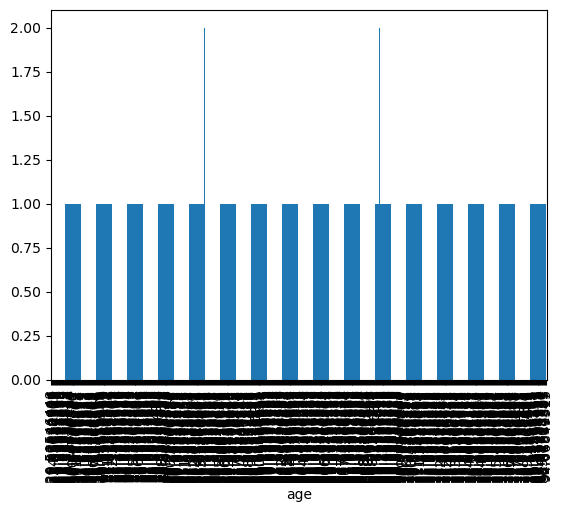

In [11]:

age_group = MRI.groupby("age")
age_count = age_group["age"].count()
age_chart = age_count.plot(kind='bar')
plt.show()

<AxesSubplot:>

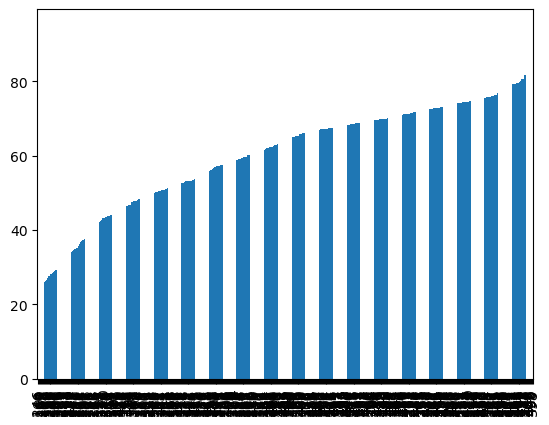

In [12]:
MRI.age.plot(kind='bar')

In [23]:
TOPMRI = pd.concat([TOP, MRI])
TOPMRI

,Unnamed: 0,participant_id,age,sex,gm_vol,wm_vol,csf_vol,gm_ivc_ratio,gmwm_ivc_ratio,wmh_vol,...,deepwm_b_cov,aca_b_cov,mca_b_cov,pca_b_cov,totalgm_b_cov,deepwm_b,aca_b,mca_b,pca_b,totalgm_b
0,0,sub-0001_1_ses-1_run-1,43.490000,M,0.71736,0.52803,0.31812,0.45881,0.79653,1.743,...,8.7620,2.2748,2.3205,2.6858,2.4316,22.1022,80.4744,68.3224,52.4614,60.6981
1,1,sub-0002_1_ses-1_run-1,38.300000,F,0.72383,0.62394,0.25673,0.45112,0.83999,1.629,...,9.0749,1.7564,2.3989,1.5982,1.9738,23.5401,87.3972,78.0359,63.9932,71.6047
2,2,sub-0019_1_ses-1_run-1,32.300000,M,0.71224,0.53295,0.33594,0.45046,0.78753,0.621,...,8.8791,1.9850,1.8702,2.1648,2.1723,27.5573,94.0855,86.3816,62.6012,74.0588
3,3,sub-0020_1_ses-1_run-1,21.970000,F,0.67042,0.43458,0.25974,0.49124,0.80968,0.736,...,6.2080,1.8657,1.9092,1.6402,1.8734,27.1813,100.3259,90.7345,68.0812,79.1128
4,4,sub-0022_1_ses-1_run-1,37.520000,F,0.63666,0.46938,0.22144,0.47960,0.83319,2.009,...,7.4561,1.6049,2.0383,1.7943,1.7936,25.4706,86.7965,77.5578,69.0419,73.3492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,358,sub-59295_2_ses-2_run-1,84.873973,M,0.63134,0.49361,0.48013,0.39334,0.70087,30.184,...,1.6956,2.6070,1.7958,2.2252,2.1967,26.5222,55.3426,53.8498,33.5675,43.2865
46,54,sub-59116_2_ses-2_run-1,85.776832,F,0.50279,0.33551,0.40553,0.40423,0.67397,12.243,...,2.6097,1.8899,1.6466,2.1033,1.8811,24.8206,60.6278,52.4160,40.8453,47.6168
426,491,sub-59376_2_ses-2_run-1,85.816139,M,0.64732,0.50652,0.51280,0.38840,0.69232,38.829,...,1.9059,2.0651,2.0107,1.7679,1.9072,26.6987,74.7131,66.6457,48.0675,57.7995
490,562,sub-59423_1_ses-1_run-1,92.049315,M,0.48135,0.39877,0.56566,0.33293,0.60875,34.660,...,2.1008,2.1129,1.8008,2.4226,1.9997,33.8502,77.4641,62.7529,59.4109,56.4401


<AxesSubplot:>

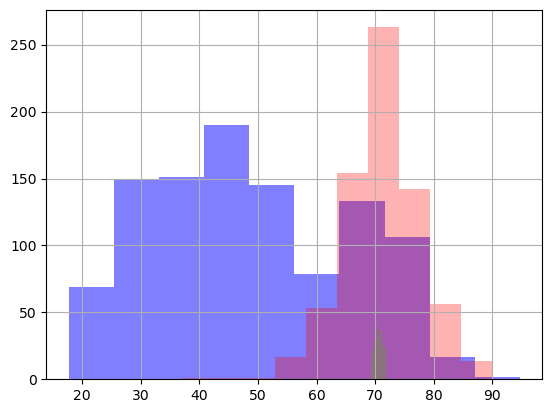

In [25]:
TOPMRI.age.hist(ls='dashed', lw=3, fc=(0, 0, 1, 0.5))
#TOP.age.hist(ls='dotted', lw=3, fc=(1, 0, 0, 0.3))
INI.age.hist(ls='dotted', lw=3, fc=(0, 1, 0, 0.3))
SAB.age.hist(ls='dotted', lw=3, fc=(1, 0, 0, 0.3))